# Linear Regression Assignment
## Geely Automotive Pricing Model
#####  By: Priyanka Rotte

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

#### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

-----------

In [2994]:
#To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2995]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading and understanding the data

In [2996]:
#Importing the data
carData = pd.read_csv('CarPrice_Assignment.csv')
carData.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2997]:
carData.shape

(205, 26)

In [2998]:
carData.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [2999]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3000]:
#Checking the data for missing values
round(carData.isnull().sum()/len(carData.index), 2)*100

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

The dataframe has no null/missing values!

In [3001]:
#Checking for duplicates
carData.loc[carData.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


No duplicates in the dataset!

In [3002]:
#Dropping car_ID as it is not relevant
carData.drop('car_ID',axis=1,inplace=True)

In [3003]:
#Extracting Company name from Car name
carData['CompanyName'] = carData['CarName'].apply(lambda x : x.split(' ')[0])
carData.drop(['CarName'],axis=1,inplace=True)
carData.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [3004]:
carData.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see that there are some spelling errors in CompanyName such as 'maxda' and 'mazda', 'porcshce' and 'porsche', 'toyouta' and 'toyota', 'vokswagen', 'vw' and 'volkswagen'.

In [3005]:
#Correcting spelling errors
carData.CompanyName = carData.CompanyName.str.lower()

carData.CompanyName.replace('maxda','mazda',inplace=True)
carData.CompanyName.replace('porcshce','porsche',inplace=True)
carData.CompanyName.replace('toyouta','toyota',inplace=True)
carData.CompanyName.replace('vokswagen','volkswagen',inplace=True)
carData.CompanyName.replace('vw','volkswagen',inplace=True)

carData.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### Checking data types
symboling is a categorical variable as per the data dictionary but its is being treated as int64. Hence, is should be converted to categorical. It is given that the value 3 indicates that the auto is risky and -3 indicates that it is probably safe. We can convert these values as follows:
- -3,-2,-1: safe (We could've taken only -3 and -2 as safe but there are no cars with -3 values)
- 0,1: moderate
- 2,3: risky

In [3006]:
carData['symboling'] = carData['symboling'].map({-3: 'safe', -2: 'safe',-1: 'safe',0: 'moderate',1: 'moderate',2: 'risky',3:'risky'})

### 2. Data visualization

#### Visualising Numeric Variables

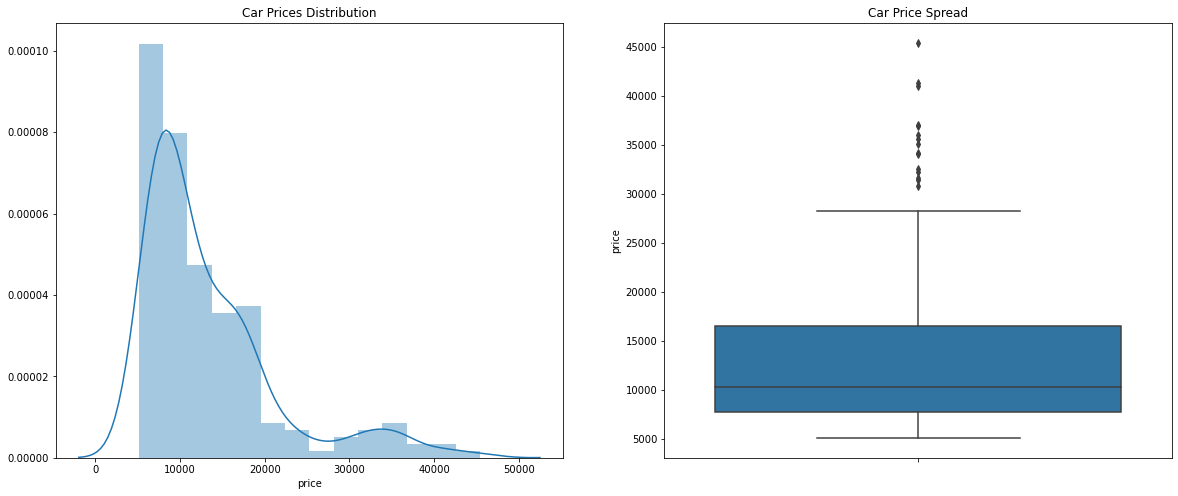

In [3007]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Prices Distribution')
sns.distplot(carData.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=carData.price)

plt.show()

Observations:<br>
- The plot seems to be right-skewed, i.e. most prices in the data are low.
- Prices are far spread out from the mean, which indicates a high variance in the car prices.

In [3008]:
#Outlier treatment (price less than 3 standard deviation from mean price)
carData= carData[np.abs(carData.price-carData.price.mean()) <= (3*carData.price.std())]

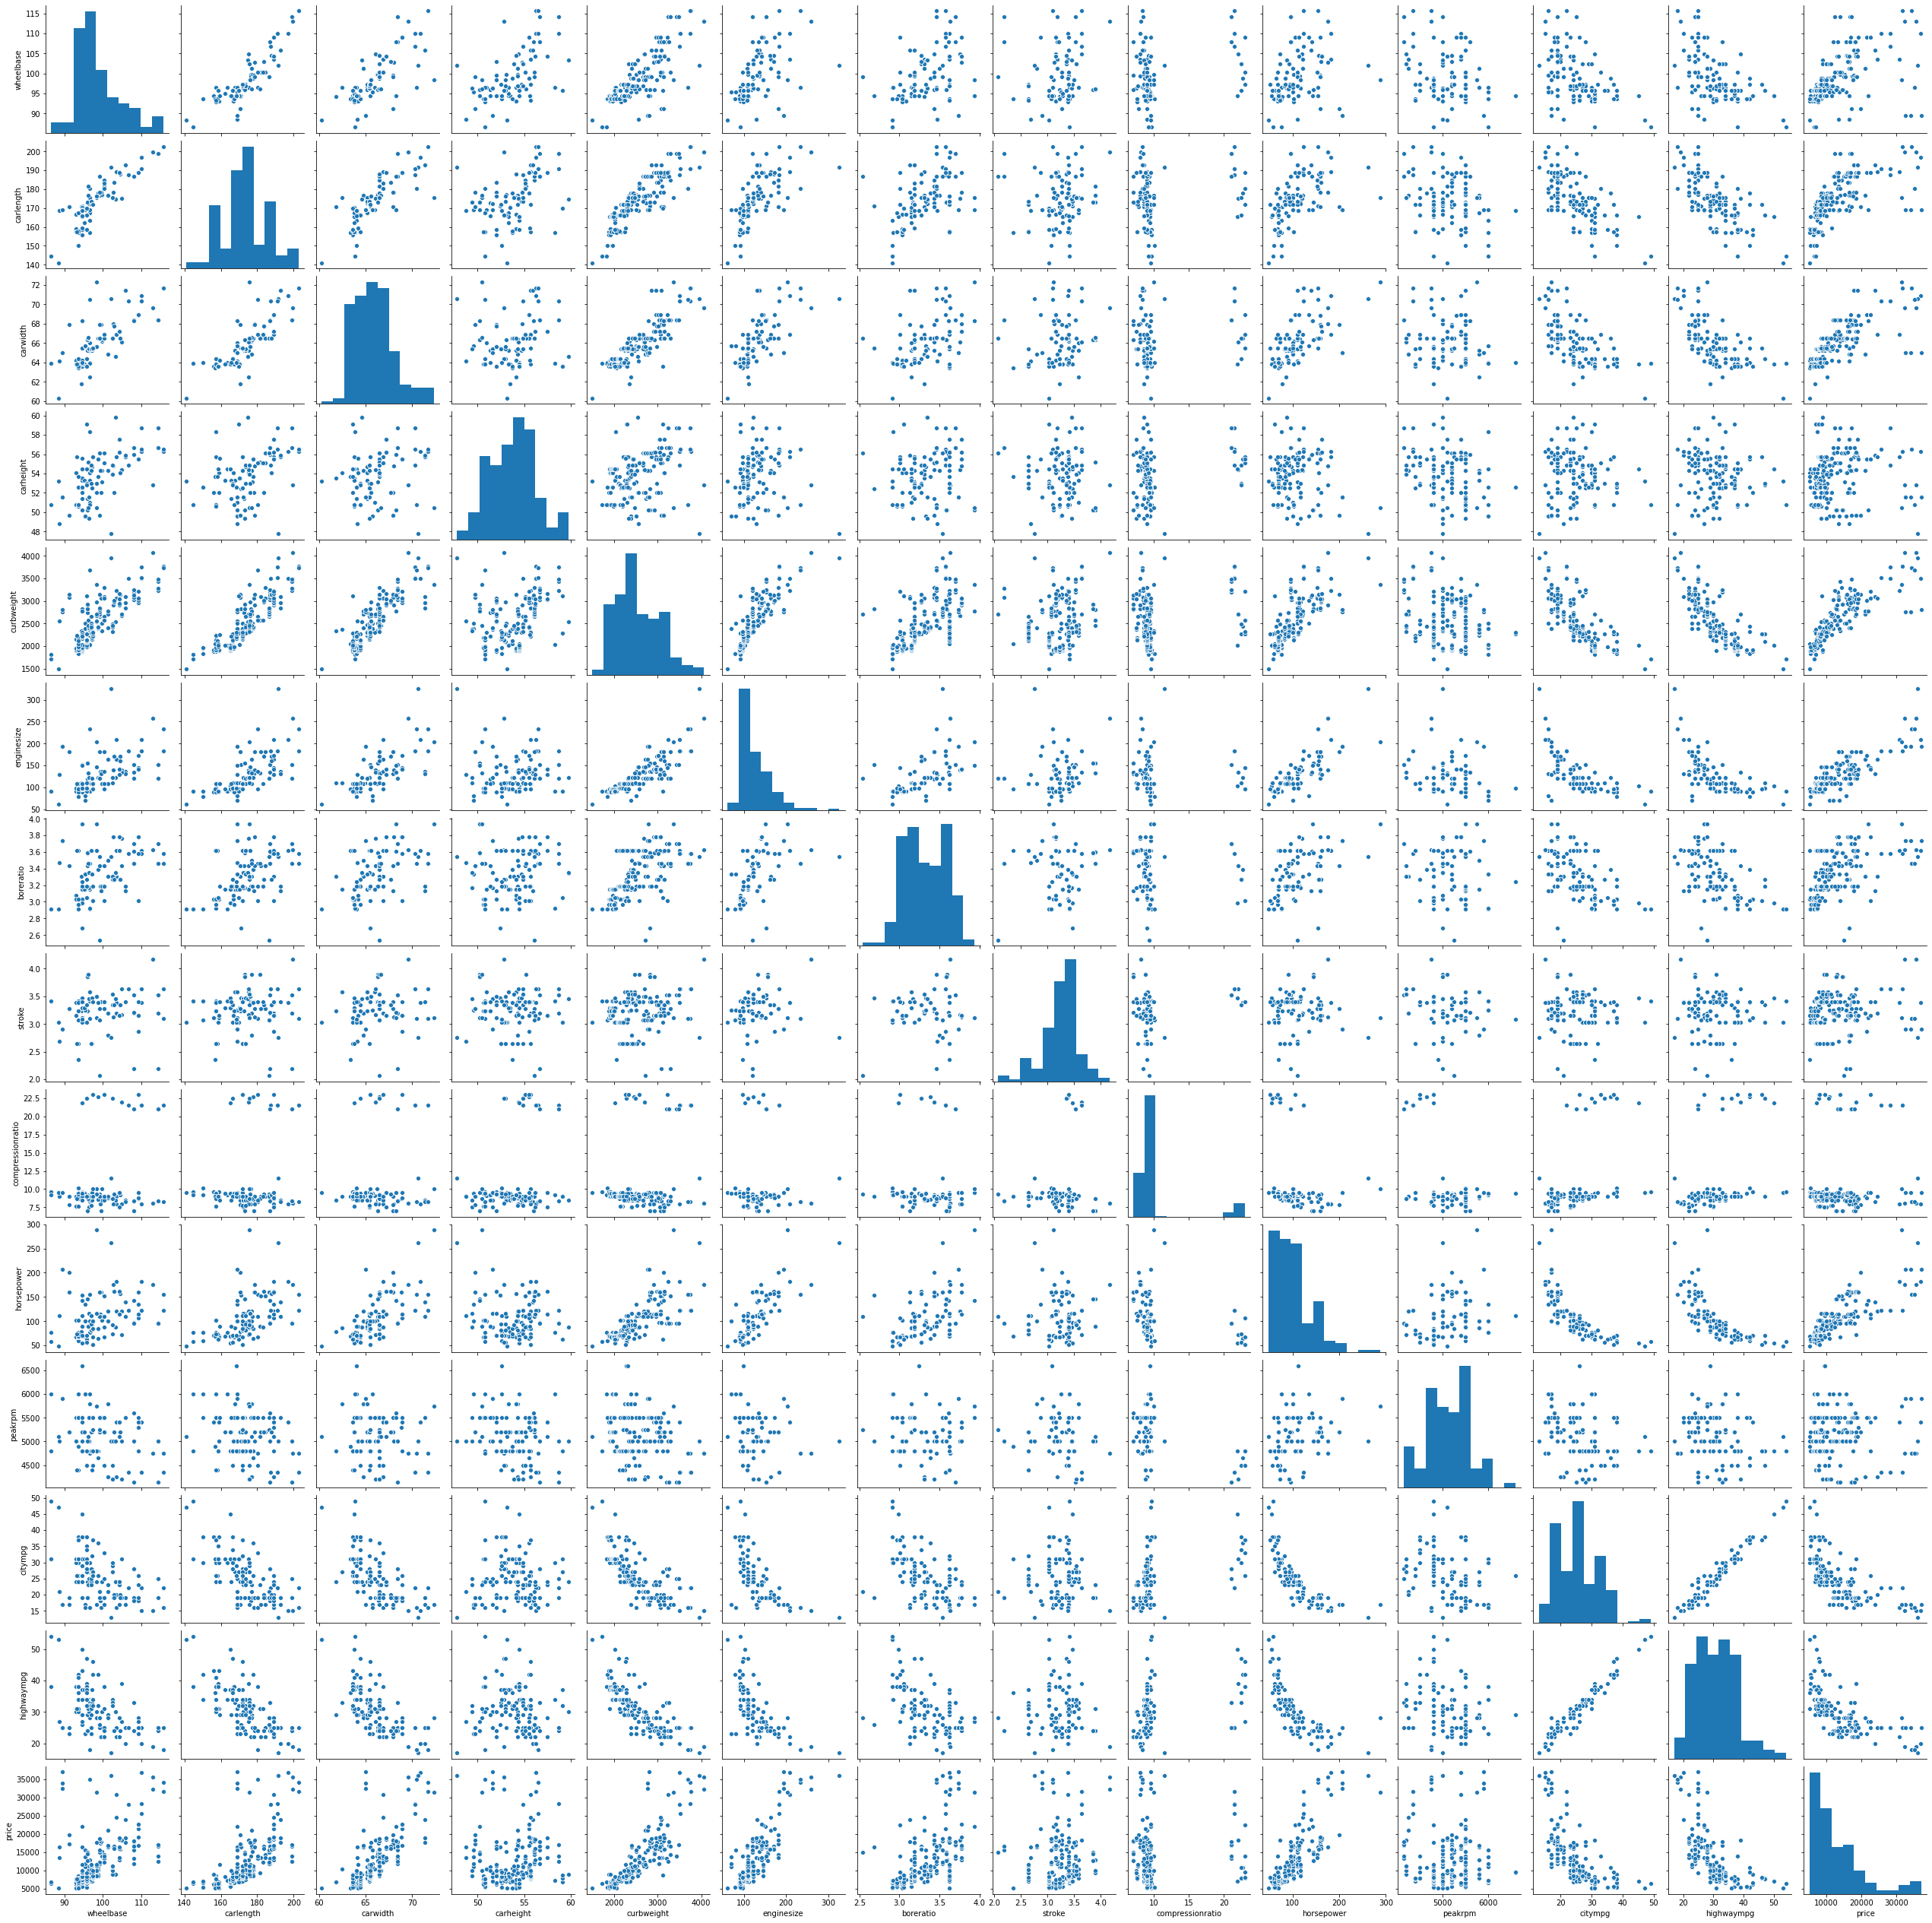

In [3009]:
#Pair plots
sns.pairplot(carData)
plt.show()

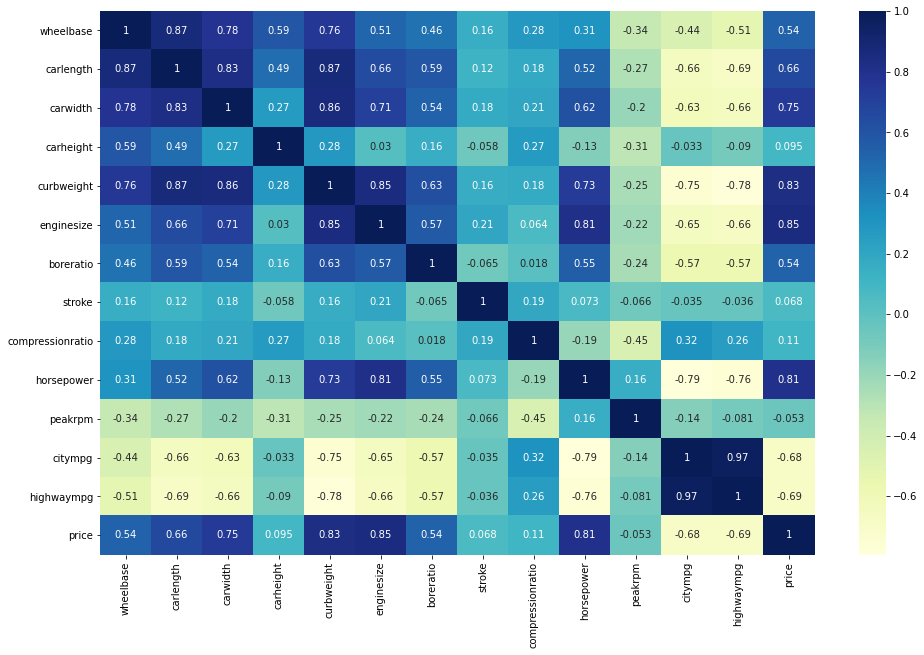

In [3010]:
#Heat map
plt.figure(figsize = (16, 10))
cor=carData.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

From pairpots and heatmap, we can get an idea about how numerical variables are related to each other.<br>
For example:<br>
Some variables have significant **positive** relationship with **price** such as **carwidth, curbweight, enginesize, and horsepower**.<br>
Some have significant **negative** relationship with **price** such as **citympg and highwaympg**.

We can also see some of the multicollinearity in the data from the pairplots and heatmaps.<br>
For example:<br>
- citympg and highwaympg have a strong positive correlation of 0.97.
- wheelbase, carlength, and carwidth have significant positive correlation with each other.
- curbweight has significant positive correlation with enginesize, carlength, and carwidth.
- citympg and highwaympg have significant negative correlation with horsepower and curbweight.

#### Visualising categorical variables

In [3011]:
cat_var = list(carData.columns[carData.dtypes == 'object'])
cat_var

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CompanyName']

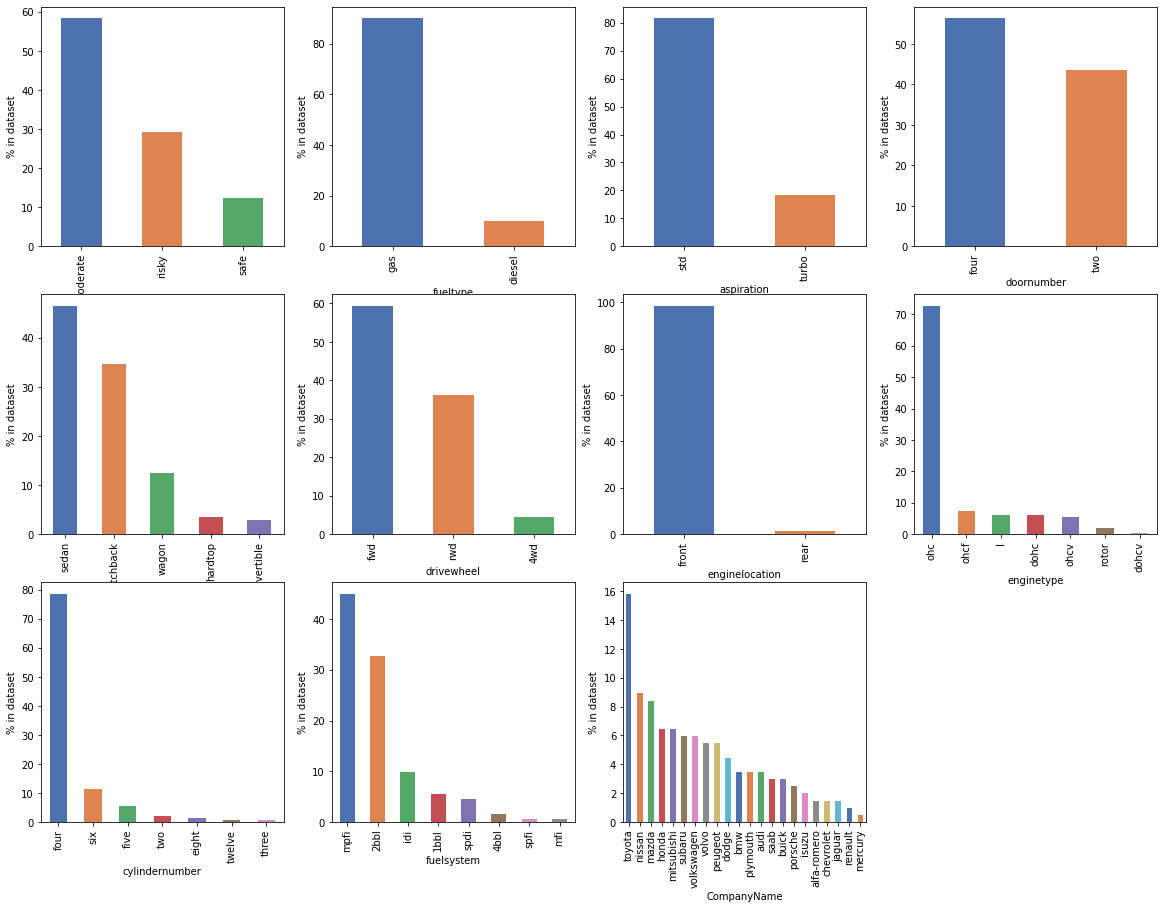

In [3012]:
#Plotting percentage of cars with respect to different categorical features
plt.figure(figsize=(20, 15))
for var in cat_var:
    plt.subplot(3,4,cat_var.index(var)+1)
    values = (carData[var].value_counts(normalize=True)*100)
    plt_s = values.plot.bar(color=sns.color_palette('deep'))
    plt_s.set(xlabel = var, ylabel = '% in dataset')

From the above graphs, we can see which features are there in most cars. From this, we can interpret dominant features in the market and advise Geely Automotives accordingly. Most dominant features are:
- symboling: moderate(0,1)
- fueltype: gas
- aspiration: standard
- doornumber: four
- carbody: sedan
- drivewheel: forward
- enginelocation: front
- enginetype: ohc
- cylindernumber: four
- fuelsystem: mpfi
- CompanyName: Toyota

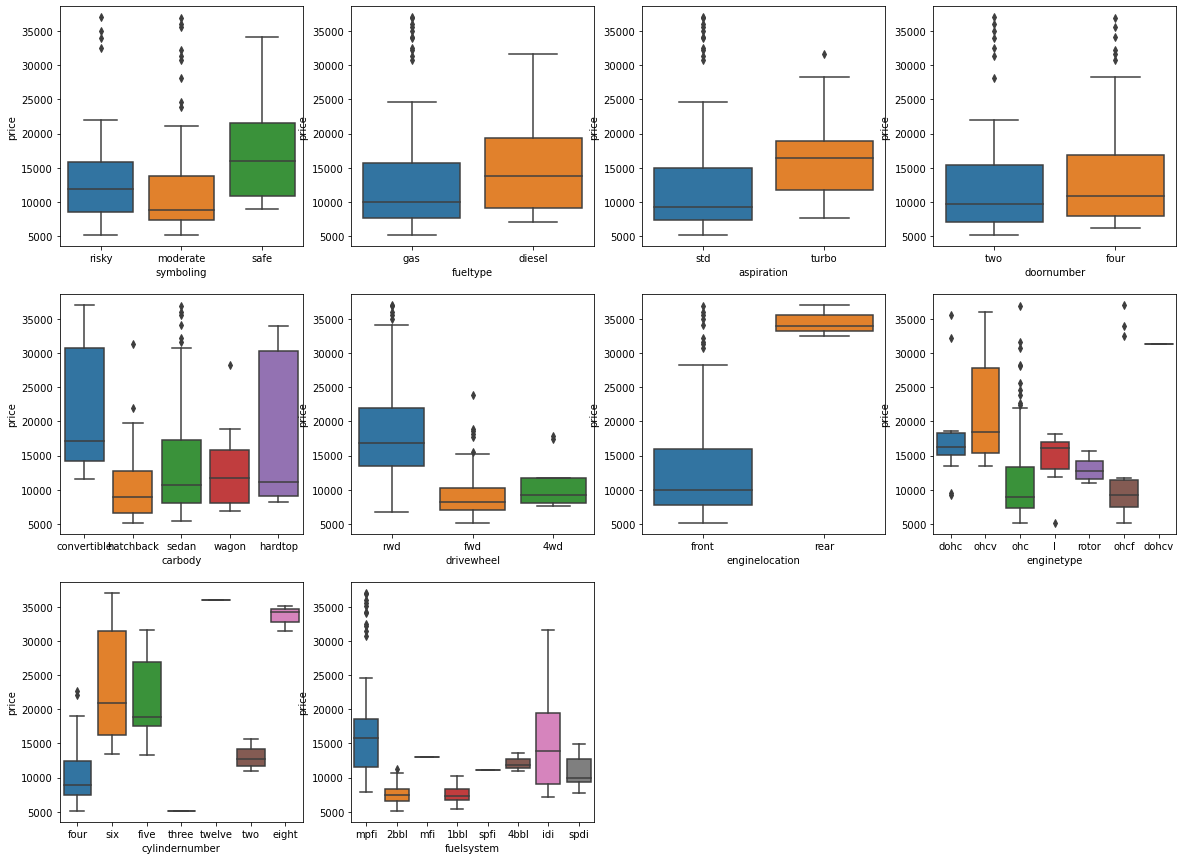

In [3013]:
#Plotting car features against car prices
plt.figure(figsize=(20, 15))
for var in cat_var[:-1]:
    plt.subplot(3,4,cat_var.index(var)+1)
    sns.boxplot(x = var, y = 'price', data = carData)
plt.show()

From the above boxplots, following observations can be made:<br>
- Cars with safe symboling tend to have higher prices as we can assume. But there seems to be a dip in the price for moderate symboling.
- Fuel type, aspiration, and engine location seems to have effects on car prices while door numbers does not have much effect.
- Convertibles and hardtop cars have significantly higher prices than others. Similarly, real wheel drive is costlier compared to other drive wheels.
- ohcv engine type has higher price range comapred to other engine types, and engine types seems to have relationship with the price.

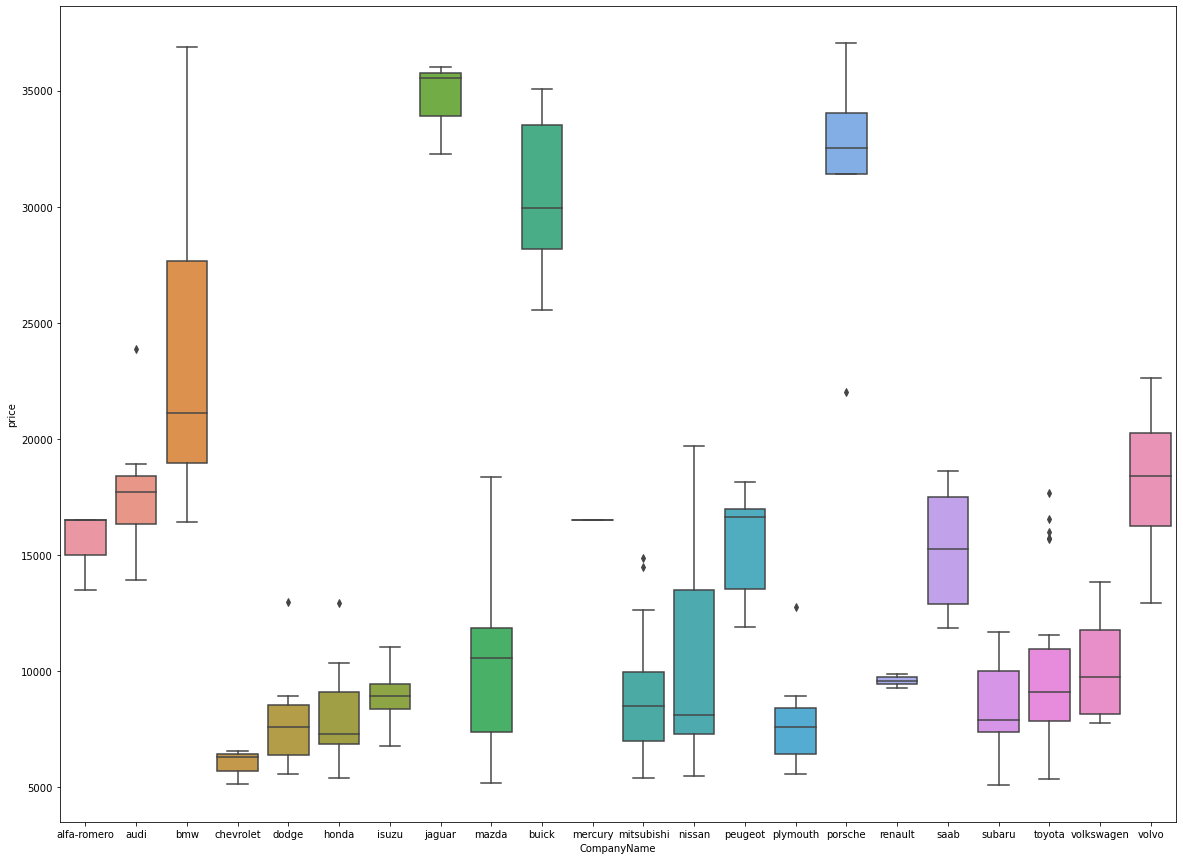

In [3014]:
#For Company Name
plt.figure(figsize=(20, 15))
sns.boxplot(x = "CompanyName", y = 'price', data = carData)
plt.show()

In [3015]:
print("Average car price: ", carData['price'].mean())
print(carData.groupby('CompanyName').price.mean().sort_values(ascending=False).head())

Average car price:  12841.834985148515
CompanyName
jaguar     34600.000000
porsche    31400.500000
buick      30469.333333
bmw        23947.857143
volvo      18063.181818
Name: price, dtype: float64


From the above boxplot and average prices for each company, we can observe that every comapny has range in which it produces cars while producing some cars outside the range. Jaguar, Buick, Porsche, BMW, and Volvo have higher averge prices than others.

#### Multivariate analysis

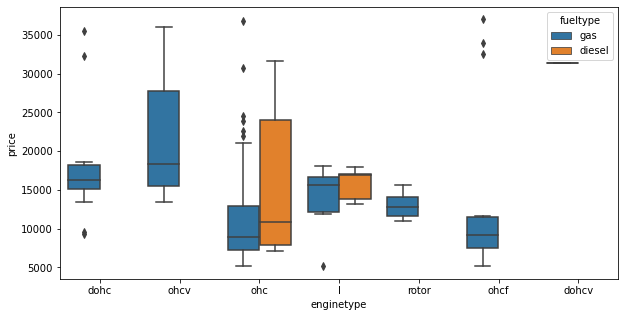

In [3016]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fueltype', data=carData)
plt.show()

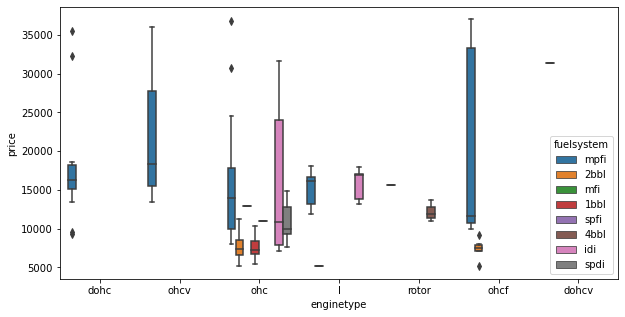

In [3017]:
plt.figure(figsize=(10,5))
sns.boxplot(x='enginetype', y='price', hue = 'fuelsystem', data=carData)
plt.show()

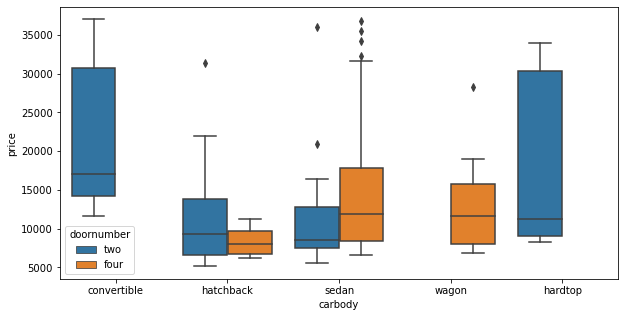

In [3018]:
plt.figure(figsize=(10,5))
sns.boxplot(x='carbody', y='price', hue = 'doornumber', data=carData)
plt.show()

Observations:<br>
- All engines have gas fuel types while only two have diesel types. For engines which have diesel types, diesl ones are priced higher than gas ones. Price ranges for gas types have more outliers.
- Most of the engine types have mpfi systems and its the costliest among all fuel systems, and mpfi and idi systems have largest price ranges.
- Convertible and hardtop only have two doors while wagon always has four doors. For hatchback, price for two-doors is more while opposite is true in the case of sedan.

#### Deriving new features and visualization

From the pair plots and heat maps we know that citympg and highwaympg are highly correlated, so we create a new variable fuel efficiency based on these two. We assume that the efficiency depends more on the citympg.

In [3019]:
#Fuel efficiency
carData['fuelEfficiency'] = (0.55 * carData['citympg']) + (0.45 * carData['highwaympg'])
#Dropping original variables
carData.drop(['highwaympg','citympg'],axis=1,inplace=True)

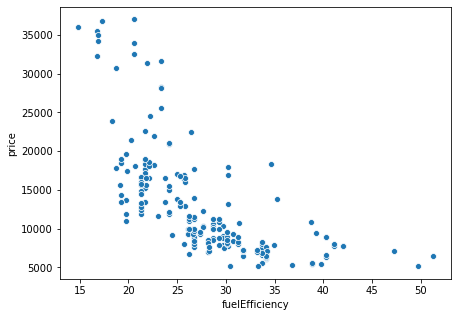

In [3020]:
#Plotting fuelEfficiency vs price
plt.figure(figsize=(7, 5))
sns.scatterplot(x = 'fuelEfficiency', y = 'price', data = carData)
plt.show()

We can see from the scatter plot that the fuel efficiency has negative correlation with price as it should be. 

From visualizations, we saw that the car comapanies can be divided based on their mean prices into different bins. This way, interpretation will be much easier than interpreting based on different comapny names.

In [3021]:
meanPrices = carData.groupby('CompanyName').price.mean().sort_values(ascending=False)
meanPrices

CompanyName
jaguar         34600.000000
porsche        31400.500000
buick          30469.333333
bmw            23947.857143
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

We can create three bins as:
- **Economy**: mean prices below 10000
- **Medium**: mean prices between 10000 and 20000
- **Highend**: mean prices greater than 20000

In [3022]:
#Function to create bins based on mean prices
def companyRange(CompanyName):
    if meanPrices[CompanyName] <= 10000:
        return 'Economy'
    elif meanPrices[CompanyName] <= 20000:
        return 'Medium'
    else:
        return 'Highend'
    
carData['CompanyRange'] = carData['CompanyName'].apply(companyRange)
#Dropping original variable
carData.drop(['CompanyName'],axis=1,inplace=True)
carData.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuelEfficiency,CompanyRange
0,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70,Medium
1,risky,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70,Medium
2,moderate,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15,Medium
3,risky,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70,Medium
4,risky,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80,Medium


In [3023]:
carData.groupby('CompanyRange').price.mean()

CompanyRange
Economy     8893.252632
Highend    29107.309524
Medium     13231.839151
Name: price, dtype: float64

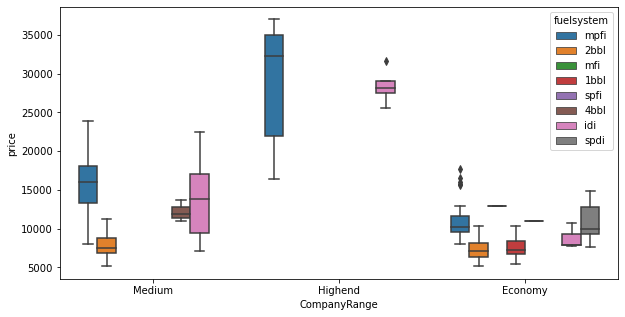

In [3024]:
#Plotting CompanyRange against price with diffrent colors for fuel systems
plt.figure(figsize=(10,5))
sns.boxplot(x='CompanyRange', y='price', hue = 'fuelsystem', data=carData)
plt.show()

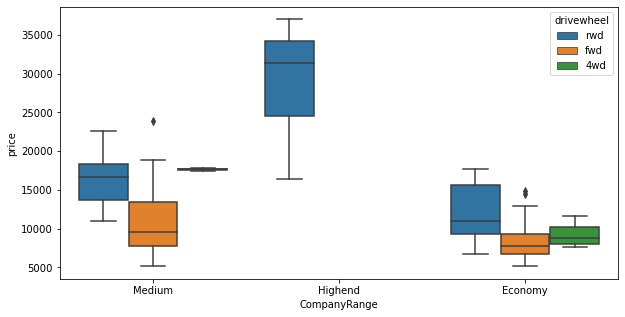

In [3025]:
#Plotting CompanyRange against price with diffrent colors for drive wheels
plt.figure(figsize=(10,5))
sns.boxplot(x='CompanyRange', y='price', hue = 'drivewheel', data=carData)
plt.show()

We can see here that the Highend cars have only mpfi and idi fuel systems. Most variety of fuel systems is found in Economy cars. Also, Highend cars prefer rwd wheels.

### 3. Data preparation

For performing Linear Regression, we need to handle categorical variables.

In [3026]:
#For variables having only two values, converting these values to 0 and 1
carData['doornumber'] = carData['doornumber'].map({'two': 1, 'four': 0})
carData['enginelocation'] = carData['enginelocation'].map({'front': 1, 'rear': 0})
carData['fueltype'] = carData['fueltype'].map({'gas': 1, 'diesel': 0})
carData['aspiration'] = carData['aspiration'].map({'std': 1, 'turbo': 0})
carData.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fuelEfficiency,CompanyRange
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70,Medium
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70,Medium
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15,Medium
3,risky,1,1,0,sedan,fwd,1,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70,Medium
4,risky,1,1,0,sedan,4wd,1,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80,Medium


In [3027]:
#Creating dummy variables for remaining categorical variables
carData = pd.get_dummies(carData, drop_first = True)
carData.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyRange_Highend,CompanyRange_Medium
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,1,0,0,0,1
3,1,1,0,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,1,0,0,0,1


### 4. Splitting the data into train and test sets

In [3028]:
from sklearn.model_selection import train_test_split
#70-30 split for train-test
np.random.seed(0)
df_train, df_test = train_test_split(carData, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Feature scaling

In [3029]:
from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler to scale all numeric variables in the same scale between 0 and 1
scaler = MinMaxScaler()

In [3030]:
#Applying scaler to all the columns except dummy variables
num_vars = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm','price', 'fuelEfficiency']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyRange_Highend,CompanyRange_Medium
1,1,1,1,1,0.068966,0.450407,0.316667,0.083333,0.411171,0.260377,...,0,0,0,0,0,1,0,0,0,1
165,1,1,1,1,0.272414,0.448780,0.308333,0.400000,0.301396,0.139623,...,0,0,0,0,0,1,0,0,0,0
197,1,1,0,1,0.610345,0.775610,0.575000,0.808333,0.602793,0.301887,...,0,0,0,0,0,1,0,0,0,1
169,1,1,1,1,0.406897,0.570732,0.441667,0.350000,0.412335,0.320755,...,0,0,0,0,0,1,0,0,0,0
190,1,1,1,1,0.272414,0.400000,0.308333,0.300000,0.284329,0.181132,...,0,0,0,0,0,1,0,0,0,1


In [3031]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CompanyRange_Highend,CompanyRange_Medium
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.00000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,141.000000,141.000000
mean,0.886525,0.794326,0.439716,0.985816,0.413402,0.530185,0.462766,0.50461,0.411779,0.240894,...,0.028369,0.333333,0.021277,0.113475,0.0,0.425532,0.042553,0.007092,0.106383,0.468085
std,0.318304,0.405634,0.498122,0.118672,0.198892,0.194656,0.181538,0.20748,0.198452,0.146364,...,0.166616,0.473085,0.144819,0.318304,0.0,0.496186,0.202567,0.084215,0.309426,0.500759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.409756,0.308333,0.35000,0.254849,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.358621,0.518699,0.425000,0.52500,0.359193,0.188679,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.503448,0.660163,0.550000,0.65000,0.552366,0.301887,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing the data into X and y for model building

In [3032]:
y_train = df_train.pop('price')
X_train = df_train

### 5. Building the model

As suggested in the lectures, I'm using a mixed approach here. First, Recursive Feature Elimination (RFE) using SciKit Learn and then manual feature elimination and statistical analysis using statsmodel.

#### RFE

In [3033]:
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3034]:
#Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

#Running RFE
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [3035]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 17),
 ('aspiration', False, 12),
 ('doornumber', False, 19),
 ('enginelocation', True, 1),
 ('wheelbase', False, 7),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 21),
 ('horsepower', False, 23),
 ('peakrpm', True, 1),
 ('fuelEfficiency', False, 16),
 ('symboling_risky', False, 27),
 ('symboling_safe', False, 29),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 28),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 30),
 ('enginetype_ohcf', False, 22),
 ('enginetype_ohcv', False, 2),
 ('enginetype_rotor', False, 18),
 ('cylindernumber_five', False, 3),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 11),
 ('cylindernumber_th

In [3036]:
#15 best features
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'peakrpm', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv',
       'cylindernumber_four', 'cylindernumber_three', 'CompanyRange_Highend'],
      dtype='object')

In [3037]:
#Eliminated features
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'compressionratio', 'horsepower', 'fuelEfficiency',
       'symboling_risky', 'symboling_safe', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'CompanyRange_Medium'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [3038]:
#Importing required libraries
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3039]:
#Function for building the linear model
def build_model(X,y):
    #Adding a constant
    X = sm.add_constant(X)
    # fitting the model
    lm = sm.OLS(y,X).fit() 
    #Summary of the model
    print(lm.summary())  
    return X, lm

In [3040]:
#Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [3041]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

Model 1

In [3042]:
X, lm1 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     171.9
Date:                Tue, 05 May 2020   Prob (F-statistic):           9.74e-76
Time:                        23:19:40   Log-Likelihood:                 224.82
No. Observations:                 141   AIC:                            -417.6
Df Residuals:                     125   BIC:                            -370.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3161 

`enginetype_dohcv` is insignificant in presence of other variables because its p-value > 0.05. Hence, it can be dropped.

In [3043]:
X_train1 = X_train_rfe.drop(["enginetype_dohcv"], axis = 1)

Model 2

In [3044]:
X1, lm2 = build_model(X_train1, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     185.2
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.12e-77
Time:                        23:19:40   Log-Likelihood:                 224.66
No. Observations:                 141   AIC:                            -419.3
Df Residuals:                     126   BIC:                            -375.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3229 

`boreratio` is insignificant i}n presence of other variables because its p-value > 0.05. Hence, it can be dropped.

In [3045]:
X_train2 = X_train1.drop(["boreratio"], axis = 1)

Model 3

In [3046]:
X2, lm3 = build_model(X_train2, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 05 May 2020   Prob (F-statistic):           1.84e-77
Time:                        23:19:40   Log-Likelihood:                 223.33
No. Observations:                 141   AIC:                            -418.7
Df Residuals:                     127   BIC:                            -377.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2994 

`enginesize` is insignificant in presence of other variables because its p-value > 0.05. Hence, it can be dropped.

In [3047]:
X_train3 = X_train2.drop(["enginesize"], axis = 1)

Model 4

In [3048]:
X3, lm4 = build_model(X_train3, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     210.6
Date:                Tue, 05 May 2020   Prob (F-statistic):           4.58e-78
Time:                        23:19:40   Log-Likelihood:                 221.87
No. Observations:                 141   AIC:                            -417.7
Df Residuals:                     128   BIC:                            -379.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3223 

`stroke` is insignificant in presence of other variables because its p-value > 0.05. Hence, it can be dropped.

In [3049]:
X_train4 = X_train3.drop(["stroke"], axis = 1)

Model 5

In [3050]:
X4, lm5 = build_model(X_train4, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     227.3
Date:                Tue, 05 May 2020   Prob (F-statistic):           9.26e-79
Time:                        23:19:40   Log-Likelihood:                 220.61
No. Observations:                 141   AIC:                            -417.2
Df Residuals:                     129   BIC:                            -381.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3194 

`cylindernumber_three` is insignificant in presence of other variables because its p-value > 0.05. Hence, it can be dropped.

In [3051]:
X_train5 = X_train4.drop(["cylindernumber_three"], axis = 1)

Model 6

In [3052]:
X5, lm6 = build_model(X_train5, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 05 May 2020   Prob (F-statistic):           2.02e-79
Time:                        23:19:40   Log-Likelihood:                 219.23
No. Observations:                 141   AIC:                            -416.5
Df Residuals:                     130   BIC:                            -384.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3328 

All remaining features seem to be significant as shown by their p-values.

In [3053]:
#Calculating VIFs
vif = check_VIF(X_train5)
vif

,Features,VIF
0,enginelocation,45.59
1,carwidth,34.66
2,curbweight,27.91
6,carbody_sedan,14.69
5,carbody_hatchback,10.93
8,cylindernumber_four,7.15
3,peakrpm,5.02
7,carbody_wagon,4.69
9,CompanyRange_Highend,1.97
4,carbody_hardtop,1.72


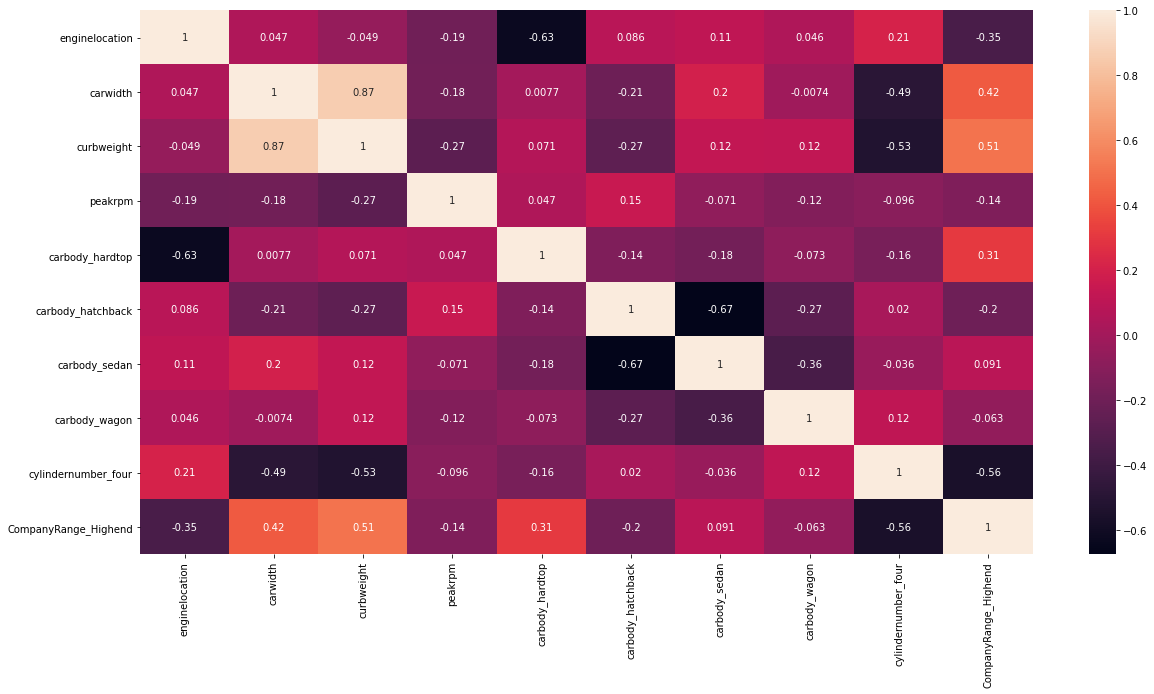

In [3054]:
#Plotting correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X_train5.corr(),annot = True)

`enginelocation` has high VIF value showing that it has high multicollinearity. But it might be important from a business perspective. Whereas, we have four features just about carbody. We can drop `carbody_hardtop` as it is highly correlated with `enginelocation`.

In [3055]:
X_train6 = X_train5.drop(["carbody_hardtop"], axis = 1)

Model 7

In [3056]:
X6, lm7 = build_model(X_train6, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 05 May 2020   Prob (F-statistic):           1.75e-78
Time:                        23:19:41   Log-Likelihood:                 213.84
No. Observations:                 141   AIC:                            -407.7
Df Residuals:                     131   BIC:                            -378.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1942 

All remaining features seem to be significant as shown by their p-values.

In [3057]:
#Calculating VIFs
vif = check_VIF(X_train6)
vif

,Features,VIF
0,enginelocation,44.57
1,carwidth,34.56
2,curbweight,27.83
5,carbody_sedan,10.80
4,carbody_hatchback,8.38
7,cylindernumber_four,6.75
3,peakrpm,4.56
6,carbody_wagon,3.68
8,CompanyRange_Highend,1.81


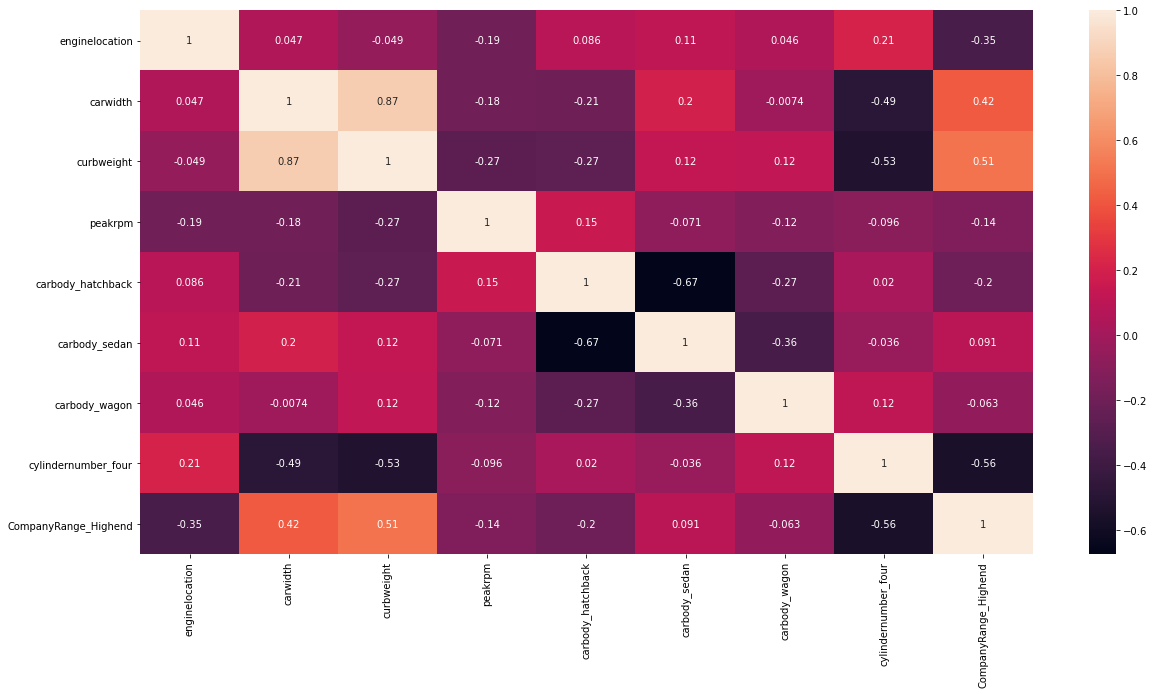

In [3058]:
#Plotting correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X_train6.corr(),annot = True)

`enginelocation` has high VIF value showing that it has high multicollinearity. But it might be important from a business perspective. We can drop the next feature with highest VIF i.e. `carwidth`.

In [3059]:
X_train7 = X_train6.drop(["carwidth"], axis = 1)

Model 8

In [3060]:
X7, lm8 = build_model(X_train7, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     241.8
Date:                Tue, 05 May 2020   Prob (F-statistic):           6.15e-75
Time:                        23:19:43   Log-Likelihood:                 202.02
No. Observations:                 141   AIC:                            -386.0
Df Residuals:                     132   BIC:                            -359.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1811 

Adj. R-squared changed from 0.942 to 0.932. Still, not a significant decrease. `carbody_sedan` is insignificant in presence of other variables because its p-value > 0.05. Hence, it can be dropped.

In [3061]:
X_train8 = X_train7.drop(["carbody_sedan"], axis = 1)

Model 9

In [3062]:
X8, lm9 = build_model(X_train8, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     269.9
Date:                Tue, 05 May 2020   Prob (F-statistic):           2.44e-75
Time:                        23:19:43   Log-Likelihood:                 199.97
No. Observations:                 141   AIC:                            -383.9
Df Residuals:                     133   BIC:                            -360.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1769 

`carbody_hatchback` is insignificant in presence of other variables because its p-value > 0.05. Hence, it can be dropped.

In [3063]:
X_train9 = X_train8.drop(["carbody_hatchback"], axis = 1)

Model 10

In [3064]:
X9, lm10 = build_model(X_train9, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     310.3
Date:                Tue, 05 May 2020   Prob (F-statistic):           5.22e-76
Time:                        23:19:43   Log-Likelihood:                 198.51
No. Observations:                 141   AIC:                            -383.0
Df Residuals:                     134   BIC:                            -362.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1674 

All remaining features seem to be significant as shown by their p-values.

In [3065]:
#Calculating VIFs
vif = check_VIF(X_train9)
vif

,Features,VIF
0,enginelocation,22.56
1,curbweight,8.78
4,cylindernumber_four,6.62
2,peakrpm,4.46
5,CompanyRange_Highend,1.77
3,carbody_wagon,1.23


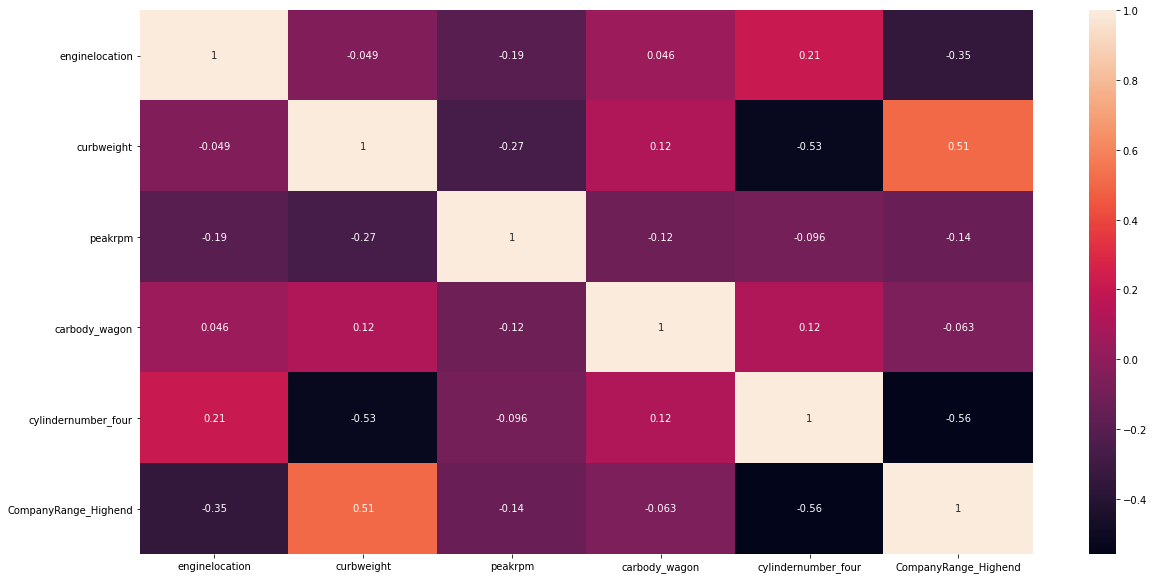

In [3066]:
#Plotting correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X_train9.corr(),annot = True)

`enginelocation` has high VIF value showing that it has high multicollinearity. But it might be important from a business perspective. We can drop `cylindernumber_four` as it has high correlation with two other features. Dropping `CompanyRange_Highend` was also tried but the Adj. r-squared dropped considerably indicating the importance of the variable.

In [3067]:
X_train10 = X_train9.drop(["cylindernumber_four"], axis = 1)

Model 11 (Final Model A)

In [3068]:
X10, lm11 = build_model(X_train10, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     342.1
Date:                Tue, 05 May 2020   Prob (F-statistic):           8.25e-75
Time:                        23:19:44   Log-Likelihood:                 192.47
No. Observations:                 141   AIC:                            -372.9
Df Residuals:                     135   BIC:                            -355.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0925 

All remaining features seem to be significant as shown by their p-values.

In [3069]:
#Calculating VIFs
vif = check_VIF(X_train10)
vif

,Features,VIF
0,enginelocation,10.65
1,curbweight,7.68
2,peakrpm,4.39
4,CompanyRange_Highend,1.66
3,carbody_wagon,1.20


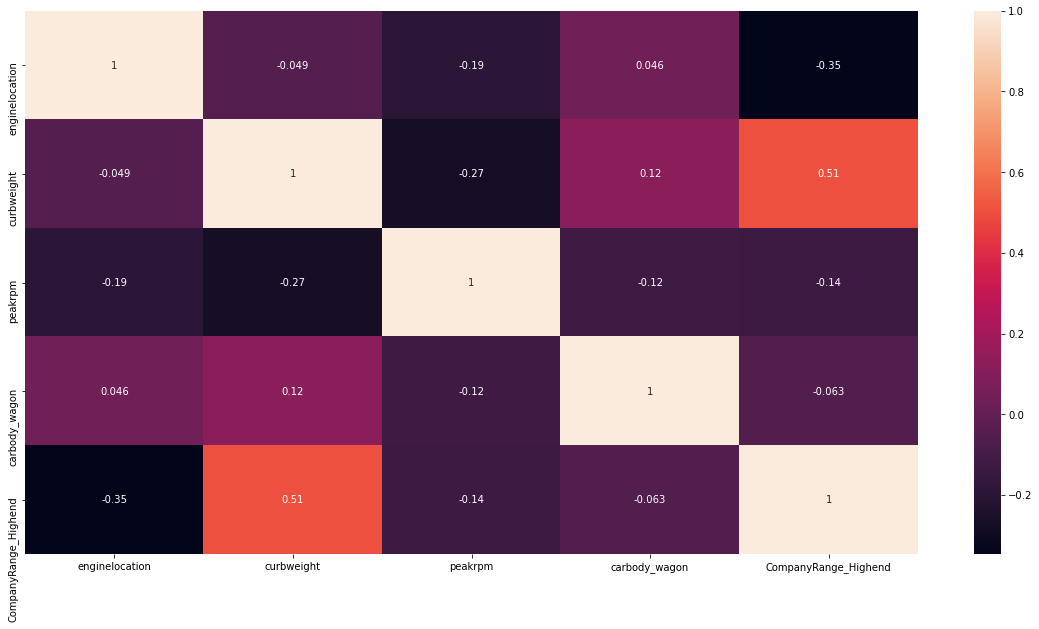

In [3070]:
#Plotting correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X_train10.corr(),annot = True)

VIFs of all remaining features seems to me acceptable. We can use this model as it is or try to to check by removing `enginelocation`.

In [3071]:
X_train11 = X_train10.drop(["enginelocation"], axis = 1)

Model 12 (Final Model B)

In [3072]:
X11, lm12 = build_model(X_train11, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     355.3
Date:                Tue, 05 May 2020   Prob (F-statistic):           6.35e-71
Time:                        23:19:44   Log-Likelihood:                 179.97
No. Observations:                 141   AIC:                            -349.9
Df Residuals:                     136   BIC:                            -335.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1705 

In [3073]:
#Calculating VIFs
vif = check_VIF(X_train11)
vif

,Features,VIF
0,curbweight,3.43
1,peakrpm,2.46
3,CompanyRange_Highend,1.47
2,carbody_wagon,1.19


All features have p-value < 0.05 and have low VIFs. No insignificant features or multicollinearity. We can stop here.

### 6. Residual Analysis of the train data
To check if the error terms are also normally distributed (one of the major assumptions of Linear Regression)

For Model A

In [3074]:
#Predicting prices for train set based on model
y_train_price = lm11.predict(X10)

Text(0.5, 0, 'Errors')

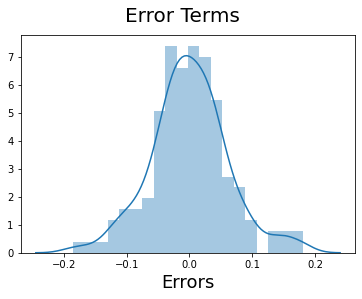

In [3075]:
#Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The curve is centred almost around zero and there is very little variance along the tails. Although not a perfect normal distribution, it is close enough.

For Model B

In [3076]:
#Predicting prices for train set based on model
y_train_price = lm12.predict(X11)

Text(0.5, 0, 'Errors')

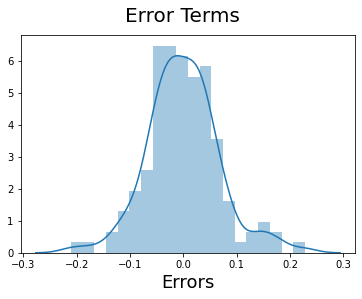

In [3077]:
#Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The curve is centred around zero and there is very little variance along the tails. Although not a perfect normal distribution, it is close enough.

### 7. Making predictions using final model 


#### Applying scaling on the test sets

In [3078]:
#Transforming numerical variables in the test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [3079]:
y_test = df_test.pop('price')
X_test = df_test

#### Predicting using Model A

In [3080]:
#Dropping unnecessary variables
X_test_new = X_test[X_train10.columns]

#Adding a constant
X_test_new = sm.add_constant(X_test_new)

In [3081]:
#Predicting prices
y_pred_A = lm11.predict(X_test_new)

#### Predicting using Model B

In [3082]:
#Dropping unnecessary variables
X_test_new = X_test[X_train11.columns]

#Adding a constant
X_test_new = sm.add_constant(X_test_new)

In [3083]:
#Predicting prices
y_pred_B = lm12.predict(X_test_new)

### 8. Model evaluation 

In [3084]:
#Importing required libraries for model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

For Model A

Text(0, 0.5, 'y_pred')

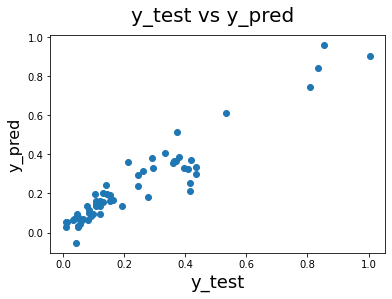

In [3085]:
#Plotting y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred_A)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)               
plt.ylabel('y_pred', fontsize=16)   

y_test vs y_pred seems to be almost linear with little variation.

In [3086]:
#Calculating RMSE and r2 score
rmse = sqrt(mean_squared_error(y_test, y_pred_A))
print('Model RMSE:',rmse)

r2=r2_score(y_test, y_pred_A)
print('Model r2_score:',r2)

Model RMSE: 0.06798519323344455
Model r2_score: 0.9039716256522065


**R-squared score on the test set = 0.903**<br>
90% of the variance in the test set is explained by the model.
r2_score on the test data is very close to the trained Adj. R-Squared value of the model. Model A has a significantly high r2_score and a low RMSE of 0.068.

For Model B

Text(0, 0.5, 'y_pred')

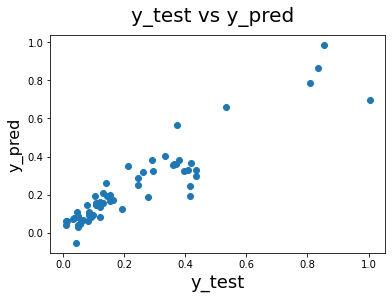

In [3087]:
#Plotting y_test vs y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred_B)
fig.suptitle('y_test vs y_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)               
plt.ylabel('y_pred', fontsize=16)   

y_test vs y_pred seems to be almost linear with little variation.

In [3088]:
#Calculating RMSE and r2 score
rmse = sqrt(mean_squared_error(y_test, y_pred_B))
print('Model RMSE:',rmse)

r2=r2_score(y_test, y_pred_B)
print('Model r2_score:',r2)

Model RMSE: 0.08246415426560422
Model r2_score: 0.8587132865529183


r2_score on the test data is not very close to the trained Adj. R-Squared value of the model. 

#### Comparing two models

| Model | Adj.R-Squared | Prob (F-statistic) | AIC | BIC | r2_score (test set) | RMSE (test set) |
| --- | --- | --- | --- | --- | --- | --- |
**Model A** | **0.924** | **8.25e-75** | **-372.9** | **-355.2** | **0.903** | **0.067** | 
Model B | 0.910 | 6.35e-71 | -349.9 | -335.2 | 0.858 | 0.082

Model B is compromising in the overall model fit parameters. Therefore considering the overall fit of the model, it is better to select **Model A with better r2_score and RMSE**.

### Final inferences

Final model has low p-values and low VIFs, indicating that the variables are able to explain the price of the automobiles to a good extent.

Final predictors which can be proposed are:

| Predictor | Coef | p-value |
| --- | --- | --- |
| enginelocation | -0.2557 | 0.000 |
| curbweight | 0.7865 | 0.000 |
| peakrpm | 0.1562 | 0.00 |
| carbody_wagon | -0.0731 | 0.000 |
| CompanyRange_Highend | 0.2957 | 0.000 |

We can see that the equation of our best fitted line is:

**$ price = 0.0925 - 0.2557  \times  enginelocation + 0.7865 \times curbweight + 0.1562 \times peakrpm - 0.0731 \times carbody\_wagon + 0.2957 \times CompanyRange\_Highend $**

The above equation tells us how the price of an automobile varies with one unit change in any of the given independent variables provided all other independent variables remain constant. We can interpret this for all the present variables as:<br>
- One unit change in curb weight will change the price of the car by 0.7865 provided other features do not change. We already saw the positive correlation between curb weight and price in data visualization.
- Similarly, one unit change in peak rpm will change the price of the car by 0.1562 provided other features are same.
- Company name also matters. As we created a derived variable for companies, the equation tells us that the companies having mean prices higher than 20000 have essential role in determining price of the car. It increases the price by a factor of 0.2957.
- The front engine location is the most commonly available feature in 98.5% of the cars in the given data. We saw while visualising the data that the cars having rear engines are priced higher than those having front engine. Since, front engine location is attributed with relatively low car prices, the coefficient for this variable is negative i.e. -0.2557.
- Similarly, car body wagon is attributed with relatively low prices. Hence, coefficient for this variable is negative i.e. -0.0731. It suggests that the presence of wagon car body decreases the price by a factor of 0.0731. 

| Adj. R-squared | r2_score | Prob (F-statistic) | AIC | BIC | RMSE
| --- | --- | --- | --- | --- | --- |
| 0.924 | 0.903 | 8.25e-75 | -372.9 | -355.2 | 0.067

Overall it is a good model, but we could still do better. Some of the ways to improve the model can be:
- To derive new more useful features (For example, instead of using carlength and carwidth which are correlated, we can use their ratio as a new variable)
- To experiment with different variables and check various model fit parameters as well as try to get a more normal distribution of error terms
- To experiment with different models such as non-linear ones which could be more robust and could better fit the data

#### Suggestions:
Based on the given data, following suggestions can be made to the Chinese automobile company Geely Auto to compete with their US and European counterparts:

- From the derived equation obtained from Linear Regression model, the company can understand which features are importatnt in deciding the price of the cars and how significant thier impact on the price is. This can be understood from the explanation given above for the equation. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, pricing dynamics of the new market can be understood from the model. <br>

- We got some useful insights while understanding and visualizing the data which will be useful for the company:
    1. **Average car price** in USA is approximately **13000 USD**. Geely Auto should keep this in mind for optimal profit and effective price determination.
    2. Geely Autos should also take note of most predominat features in the cars in USA. This will help them in understanding the market and demand from the consumers. The company can also  take this into consideration while designing new cars and improving existing ones.
        - **Symboling** (assigned insurance risk rating): moderate(0,1)
        - **Fuel type**: gas
        - **Aspiration used**: standard
        - **Number of doors**: four
        - **Body of car**: sedan
        - **Type of drive wheel**: forward
        - **Location of car engine**: front
        - **Type of engine**: ohc
        - **Cylinder number**: four
        - **Fuel system**: mpfi
        - From the company names, we can see that the **Toyota** is the most popular one, implying it will be the biggest competitor in the market. Geely Automotives can plan their strategies accordidngly.

-----------